In [1]:
import pandas as pd

In [2]:
ratings_df = pd.read_csv("Dataset\last\XWines_Slim_150K_ratings.csv") 
display(ratings_df.head(10))

C:\Users\sofia\AppData\Local\Temp\ipykernel_10916\2223713249.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  ratings_df = pd.read_csv("Dataset\last\XWines_Slim_150K_ratings.csv")


,RatingID,UserID,WineID,Vintage,Rating,Date
0,143,1356810,103471,1950,4.5,2021-11-02 20:52:59
1,199,1173759,111415,1951,5.0,2015-08-20 17:46:26
2,348,1164877,111395,1952,5.0,2020-11-13 05:40:26
3,374,1207665,111433,1953,5.0,2017-05-05 06:44:13
4,834,1075841,111431,1955,5.0,2016-09-14 20:18:38
5,876,1211463,111395,1955,5.0,2021-12-02 23:12:49
6,1005,1076348,111433,1955,4.5,2021-06-19 19:53:56
7,1020,1147051,111429,1955,5.0,2018-07-08 20:09:46
8,1029,1225931,111431,1955,5.0,2017-04-24 01:41:52
9,1399,1197513,111415,1958,5.0,2014-07-04 01:07:16


In [3]:
wines_df = pd.read_csv("Dataset\last\XWines_Slim_1K_wines.csv", index_col="WineID")
display(wines_df.head(3))

,WineName,Type,Elaborate,Grapes,Harmonize,ABV,Body,Acidity,Code,Country,RegionID,RegionName,WineryID,WineryName,Website,Vintages
WineID,,,,,,,,,,,,,,,,
100001,Espumante Moscatel,Sparkling,Varietal/100%,['Muscat/Moscato'],"['Pork', 'Rich Fish', 'Shellfish']",7.5,Medium-bodied,High,BR,Brazil,1001,Serra Gaúcha,10001,Casa Perini,http://www.vinicolaperini.com.br,"[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201..."
100002,Ancellotta,Red,Varietal/100%,['Ancellotta'],"['Beef', 'Barbecue', 'Codfish', 'Pasta', 'Pizz...",12.0,Medium-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10001,Casa Perini,http://www.vinicolaperini.com.br,"[2016, 2015, 2014, 2013, 2012, 2011, 2010, 200..."
100003,Cabernet Sauvignon,Red,Varietal/100%,['Cabernet Sauvignon'],"['Beef', 'Lamb', 'Poultry']",12.0,Full-bodied,High,BR,Brazil,1001,Serra Gaúcha,10002,Castellamare,https://www.emporiocastellamare.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."


,UserID,NumWinesRated
0,1000004,26
1,1000010,23
2,1000021,17
3,1000023,19
4,1000024,11
...,...,...
10556,2061042,13
10557,2061195,11
10558,2062232,1
10559,2062388,13


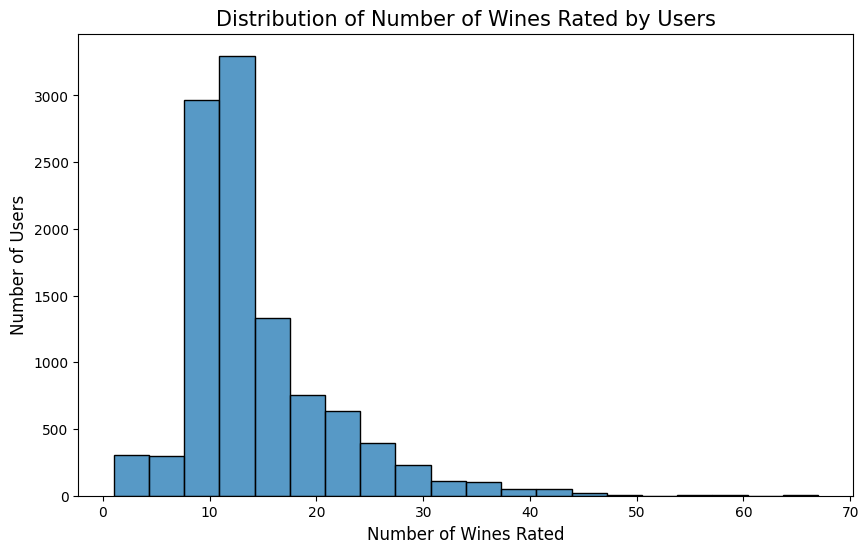

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


user_rating_count_df = ratings_df.groupby('UserID')['WineID'].count().reset_index()
user_rating_count_df.rename(columns={'WineID': 'NumWinesRated'}, inplace=True)

display(user_rating_count_df)
plt.figure(figsize=(10, 6))  
sns.histplot(user_rating_count_df['NumWinesRated'], bins=20, kde=False)


plt.title('Distribution of Number of Wines Rated by Users', fontsize=15)
plt.xlabel('Number of Wines Rated', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)




plt.show()


In [20]:

# 2. Non personalized recommendations: ordering by average rating



average_ratings_df = ratings_df.groupby('WineID')['Rating'].mean()


sorted_avg_ratings_df = average_ratings_df.sort_values(ascending=False)


display(sorted_avg_ratings_df.head(10))

WineID
182711    4.807692
144337    4.794118
181199    4.794118
174184    4.758488
112084    4.757212
180330    4.728261
182169    4.722222
111415    4.717333
183379    4.714286
181280    4.712500
Name: Rating, dtype: float64

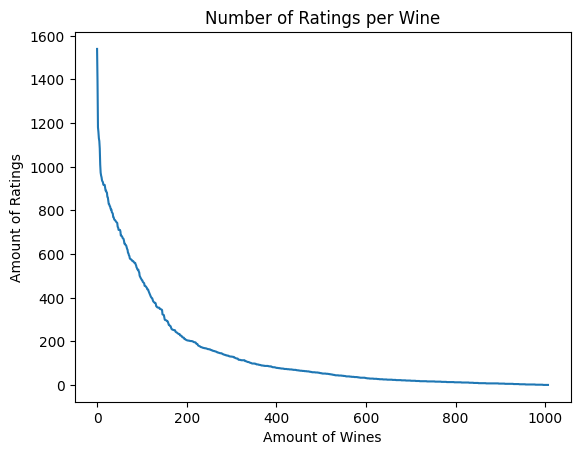

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt  # Required for setting axis labels

# Assuming count_ratings_df_ord is already sorted and created

# Plot the data
sns.lineplot(data=count_ratings_df_ord, x='index', y='UserID')

# Set the axis labels
plt.xlabel("Amount of Wines")   # X-axis label
plt.ylabel("Amount of Ratings")  # Y-axis label

# Optionally, you can also set the title of the plot
plt.title("Number of Ratings per Wine")

# Display the plot
plt.show()



In [40]:

# 2. Non personalized recommendations: ordering by average rating

average_ratings_df = ratings_df.groupby('WineID')['Rating'].mean()


sorted_avg_ratings_df = average_ratings_df.sort_values(ascending=False)


display(sorted_avg_ratings_df.head(10))

WineID
182711    4.807692
144337    4.794118
181199    4.794118
174184    4.758488
112084    4.757212
180330    4.728261
182169    4.722222
111415    4.717333
183379    4.714286
181280    4.712500
Name: Rating, dtype: float64

In [41]:
#adding average rating to dataset
average_ratings_df = ratings_df.groupby('WineID')['Rating'].mean().reset_index()

wines_with_avg_df = wines_df.merge(average_ratings_df, on='WineID', how='left')
display(wines_with_avg_df.head(10))

,WineID,WineName,Type,Elaborate,Grapes,Harmonize,ABV,Body,Acidity,Code,Country,RegionID,RegionName,WineryID,WineryName,Website,Vintages,Rating
0,100062,Origem Merlot,Red,Varietal/100%,['Merlot'],"['Beef', 'Lamb', 'Veal', 'Grilled', 'Pizza', '...",13.0,Full-bodied,Medium,BR,Brazil,1002,Vale dos Vinhedos,10014,Casa Valduga,http://www.casavalduga.com.br,"[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...",3.484848
1,100191,Reserva Chardonnay,White,Varietal/100%,['Chardonnay'],"['Rich Fish', 'Seafood', 'Risotto', 'Poultry',...",13.0,Medium-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10000,Aurora,http://www.vinicolaaurora.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201...",3.376667
2,101847,Dona Antonia Porto Reserva Tawny,Dessert/Port,Assemblage/Blend,"['Touriga Nacional', 'Touriga Franca', 'Tinta ...","['Appetizer', 'Sweet Dessert', 'Blue Cheese']",20.0,Very full-bodied,High,PT,Portugal,1031,Porto,10674,Porto Ferreira,https://sogrape.com/pt/brand/porto-ferreira,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201...",3.873932
3,102055,Fine Ruby Port,Dessert/Port,Assemblage/Blend,"['Tinta Amarela', 'Tinta Barroca', 'Touriga Fr...","['Sweet Dessert', 'Cake', 'Fruit', 'Soft Cheese']",19.5,Very full-bodied,Medium,PT,Portugal,1031,Porto,10703,Sandeman,http://www.sandeman.com,"[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...",3.628378
4,102079,Maré Alta,White,Assemblage/Blend,"['Loureiro', 'Alvarinho', 'Arinto']","['Fish', 'Shellfish', 'Vegetarian', 'Appetizer...",10.0,Very light-bodied,High,PT,Portugal,1034,Vinho Verde,11486,Fonte Pequena,https://www.casadafontepequena.pt,"[2022, 2021, 2020, 2019, 2018, 2017, 2016, 201...",4.277778
5,102645,Terras de Felgueiras Espumante de Vinho Verde ...,Sparkling,Assemblage/Blend,"['Loureiro', 'Arinto', 'Trajadura', 'Azal Bran...","['Appetizer', 'Rich Fish', 'Shellfish', 'Soft ...",11.5,Medium-bodied,Medium,PT,Portugal,1034,Vinho Verde,11521,Cooperativa Agricola de Felgueiras,http://www.vercoope.pt,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201...",3.526316
6,102902,Pátria Alentejo Selection Reserva,Red,Assemblage/Blend,"['Alicante Bouschet', 'Aragonez', 'Trincadeira']","['Beef', 'Lamb', 'Veal', 'Game Meat', 'Maturat...",14.5,Full-bodied,Medium,PT,Portugal,1039,Alentejo,12437,Carmim,http://www.carmim.eu,"[2022, 2021, 2020, 2019, 2018, 2017, 2016, 201...",4.300000
7,103003,Além do Rio Branco,White,Assemblage/Blend,"['Malvasia', 'Seara Nova', 'Arinto', 'Fernão P...","['Pasta', 'Grilled', 'Shellfish', 'Lean Fish']",9.5,Medium-bodied,High,PT,Portugal,1035,Lisboa,11676,Azueira,http://www.adegadeazueira.com,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201...",3.846154
8,103070,Calda Bordaleza Tinto,Red,Assemblage/Bordeaux Red Blend,"['Cabernet Sauvignon', 'Merlot', 'Petit Verdot']","['Beef', 'Lamb', 'Game Meat', 'Poultry']",14.0,Full-bodied,Medium,PT,Portugal,1046,Bairrada,12633,Campolargo,http://www.campolargovinhos.com,"[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...",4.144737
9,103433,Regional Tinto,Red,Assemblage/Blend,"['Aragonez', 'Syrah/Shiraz']","['Beef', 'Lamb', 'Game Meat', 'Poultry']",13.0,Full-bodied,Medium,PT,Portugal,1035,Lisboa,11681,Mundus,http://www.mundus.pt,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201...",3.181818


In [42]:
#adding count and average rating in wines dataset of how many times it has been rated

wine_rating_count_df = ratings_df.groupby('WineID')['Rating'].count().reset_index()
wine_rating_count_df.rename(columns={'Rating': 'NumRatings'}, inplace=True)

wine_avg_rating_df = ratings_df.groupby('WineID')['Rating'].mean().reset_index()
wine_avg_rating_df.rename(columns={'Rating': 'AvgRating'}, inplace=True)

wines_df = wines_df.merge(wine_rating_count_df, on='WineID', how='left')
wines_df = wines_df.merge(wine_avg_rating_df, on='WineID', how='left')

display(wines_df.head(10))

,WineID,WineName,Type,Elaborate,Grapes,Harmonize,ABV,Body,Acidity,Code,Country,RegionID,RegionName,WineryID,WineryName,Website,Vintages,NumRatings,AvgRating
0,100062,Origem Merlot,Red,Varietal/100%,['Merlot'],"['Beef', 'Lamb', 'Veal', 'Grilled', 'Pizza', '...",13.0,Full-bodied,Medium,BR,Brazil,1002,Vale dos Vinhedos,10014,Casa Valduga,http://www.casavalduga.com.br,"[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...",165,3.484848
1,100191,Reserva Chardonnay,White,Varietal/100%,['Chardonnay'],"['Rich Fish', 'Seafood', 'Risotto', 'Poultry',...",13.0,Medium-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10000,Aurora,http://www.vinicolaaurora.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201...",150,3.376667
2,101847,Dona Antonia Porto Reserva Tawny,Dessert/Port,Assemblage/Blend,"['Touriga Nacional', 'Touriga Franca', 'Tinta ...","['Appetizer', 'Sweet Dessert', 'Blue Cheese']",20.0,Very full-bodied,High,PT,Portugal,1031,Porto,10674,Porto Ferreira,https://sogrape.com/pt/brand/porto-ferreira,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201...",234,3.873932
3,102055,Fine Ruby Port,Dessert/Port,Assemblage/Blend,"['Tinta Amarela', 'Tinta Barroca', 'Touriga Fr...","['Sweet Dessert', 'Cake', 'Fruit', 'Soft Cheese']",19.5,Very full-bodied,Medium,PT,Portugal,1031,Porto,10703,Sandeman,http://www.sandeman.com,"[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...",148,3.628378
4,102079,Maré Alta,White,Assemblage/Blend,"['Loureiro', 'Alvarinho', 'Arinto']","['Fish', 'Shellfish', 'Vegetarian', 'Appetizer...",10.0,Very light-bodied,High,PT,Portugal,1034,Vinho Verde,11486,Fonte Pequena,https://www.casadafontepequena.pt,"[2022, 2021, 2020, 2019, 2018, 2017, 2016, 201...",9,4.277778
5,102645,Terras de Felgueiras Espumante de Vinho Verde ...,Sparkling,Assemblage/Blend,"['Loureiro', 'Arinto', 'Trajadura', 'Azal Bran...","['Appetizer', 'Rich Fish', 'Shellfish', 'Soft ...",11.5,Medium-bodied,Medium,PT,Portugal,1034,Vinho Verde,11521,Cooperativa Agricola de Felgueiras,http://www.vercoope.pt,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201...",19,3.526316
6,102902,Pátria Alentejo Selection Reserva,Red,Assemblage/Blend,"['Alicante Bouschet', 'Aragonez', 'Trincadeira']","['Beef', 'Lamb', 'Veal', 'Game Meat', 'Maturat...",14.5,Full-bodied,Medium,PT,Portugal,1039,Alentejo,12437,Carmim,http://www.carmim.eu,"[2022, 2021, 2020, 2019, 2018, 2017, 2016, 201...",5,4.300000
7,103003,Além do Rio Branco,White,Assemblage/Blend,"['Malvasia', 'Seara Nova', 'Arinto', 'Fernão P...","['Pasta', 'Grilled', 'Shellfish', 'Lean Fish']",9.5,Medium-bodied,High,PT,Portugal,1035,Lisboa,11676,Azueira,http://www.adegadeazueira.com,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201...",13,3.846154
8,103070,Calda Bordaleza Tinto,Red,Assemblage/Bordeaux Red Blend,"['Cabernet Sauvignon', 'Merlot', 'Petit Verdot']","['Beef', 'Lamb', 'Game Meat', 'Poultry']",14.0,Full-bodied,Medium,PT,Portugal,1046,Bairrada,12633,Campolargo,http://www.campolargovinhos.com,"[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...",38,4.144737
9,103433,Regional Tinto,Red,Assemblage/Blend,"['Aragonez', 'Syrah/Shiraz']","['Beef', 'Lamb', 'Game Meat', 'Poultry']",13.0,Full-bodied,Medium,PT,Portugal,1035,Lisboa,11681,Mundus,http://www.mundus.pt,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201...",22,3.181818


In [43]:
#wines_df = wines_df.iloc[:, :-1] #to remove extra columns

In [44]:
minimum_ratings = 20


filtered_wines_df = filtered_wines_df[filtered_wines_df['NumRatings'] > minimum_ratings]


sorted_avg_ratings_df = filtered_wines_df.sort_values(by='AvgRating', ascending=False)


joined_df = sorted_avg_ratings_df.merge(wines_df[['WineID', 'WineName']], on='WineID', how='left')

display(joined_df[['WineName', 'AvgRating', 'NumRatings']].head(10))

,WineName,AvgRating,NumRatings
0,The Visionary Cabernet Sauvignon,4.420000,25
1,Riserva Prêt-A-Porter,4.243590,39
2,Vieille Vigne Gevrey-Chambertin,4.213115,122
3,Gran Malbec,4.210526,114
4,Calda Bordaleza Tinto,4.144737,38
5,Coyam,4.098259,804
6,Zinfandel,4.020000,25
7,Kormilitsa Red,4.000000,24
8,Pommard Premier Cru 'Grand Clos des Épenots',3.989286,140
9,Estate Pinot Noir,3.976744,86


In [45]:

#Looking at all the wines of a specific type that have been rated a miinumun amiunt
# Define the type and minimum number of ratings
type_filter = 'Red'  # Example type; change as needed
minimum_ratings = 20

average_ratings_df = ratings_df.groupby('WineID')['Rating'].mean().reset_index()
average_ratings_df.rename(columns={'Rating': 'AvgRating'}, inplace=True)

rating_counts_df = ratings_df.groupby('WineID')['Rating'].count().reset_index()
rating_counts_df.rename(columns={'Rating': 'NumRatings'}, inplace=True)


filtered_wines_df = average_ratings_df.merge(rating_counts_df, on='WineID')
filtered_wines_df = filtered_wines_df.dropna(subset=['NumRatings']) 
filtered_wines_df = filtered_wines_df[filtered_wines_df['NumRatings'] > minimum_ratings]

if 'Type' in wines_df.columns:
    
    filtered_wines_df = filtered_wines_df.merge(wines_df[['WineID', 'Type']], on='WineID', how='left')

    filtered_wines_df['Type'].fillna('', inplace=True)
    
    filtered_wines_df = filtered_wines_df[filtered_wines_df['Type'].str.contains(type_filter, case=False)]
else:
    print("Error: 'Type' column is missing from wines_df.")


sorted_avg_ratings_df = filtered_wines_df.sort_values(by='AvgRating', ascending=False)
joined_df = sorted_avg_ratings_df.merge(wines_df[['WineID', 'WineName']], on='WineID', how='left')


display(joined_df[['WineName', 'AvgRating', 'NumRatings', 'Type']].head(10))


C:\Users\antoi\AppData\Local\Temp\ipykernel_51120\576086259.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_wines_df['Type'].fillna('', inplace=True)


,WineName,AvgRating,NumRatings,Type
0,The Visionary Cabernet Sauvignon,4.420000,25,Red
1,Riserva Prêt-A-Porter,4.243590,39,Red
2,Vieille Vigne Gevrey-Chambertin,4.213115,122,Red
3,Gran Malbec,4.210526,114,Red
4,Calda Bordaleza Tinto,4.144737,38,Red
5,Coyam,4.098259,804,Red
6,Zinfandel,4.020000,25,Red
7,Kormilitsa Red,4.000000,24,Red
8,Pommard Premier Cru 'Grand Clos des Épenots',3.989286,140,Red
9,Estate Pinot Noir,3.976744,86,Red


In [46]:

# selecting random user
users_ratings = ratings_df.groupby('UserID').count()

selected = users_ratings['Rating'] > 50
selected_users = users_ratings.loc[selected]

if selected_users.empty:
    print("No users have rated more than 200 items.")
else:
    
    random_selected = selected_users.sample() 
    select_column_df = random_selected.reset_index()['UserID'] 
    selected_user = select_column_df.iloc[0] 

    print("Selected user: " + str(selected_user))


Selected user: 1048267


In [47]:

# Getting all rated wines by this user
selected_user_ratings = ratings_df[ratings_df['UserID'] == selected_user]


selected_user_ratings = selected_user_ratings.sort_values(by='WineID', ascending=True)

print("Rated wines: " + str(selected_user_ratings.shape[0]))

display(selected_user_ratings.head(10))


Rated wines: 67


,RatingID,UserID,WineID,Vintage,Rating,Date
142672,20677475,1048267,100001,N.V.,3.5,2019-07-29 16:25:26
42269,4988614,1048267,100010,2012,3.5,2015-06-17 23:51:06
142370,20662537,1048267,100022,N.V.,3.5,2019-07-25 10:54:43
50713,6407525,1048267,100046,2013,4.0,2019-08-18 12:23:34
94140,12837809,1048267,100052,2016,3.5,2020-11-11 18:30:01
43502,5183517,1048267,100055,2012,4.0,2020-06-24 10:41:04
101062,13980397,1048267,100062,2016,3.5,2020-05-01 10:19:49
51806,6571302,1048267,100063,2013,4.0,2020-09-09 20:23:23
141199,20609415,1048267,100067,N.V.,4.0,2021-08-07 00:08:33
39730,4603659,1048267,100086,2012,3.0,2019-08-12 19:11:29


In [48]:


# getting the red wines the user rated

rated_wine_ids = list(selected_user_ratings['WineID'])


rated_wines_df = wines_df[wines_df['WineID'].isin(rated_wine_ids)]

rated_wines_df = rated_wines_df[['WineName', 'Type']] 

print("Rated wines: " + str(rated_wines_df.shape[0]))

display(rated_wines_df.head(10))


Rated wines: 3


,WineName,Type
0,Origem Merlot,Red
70,Reserva Cabernet Franc,Red
79,Pinot Noir,Red


In [49]:


#Adding the rating to these wines

rated_wine_ids = list(selected_user_ratings['WineID'])

rated_wines_df = wines_df[wines_df['WineID'].isin(rated_wine_ids)]


rated_wines_df = rated_wines_df.merge(selected_user_ratings[['WineID', 'Rating']], on='WineID', how='left')

rated_wines_df = rated_wines_df[['WineName', 'Type', 'Rating']]

print("Rated wines: " + str(rated_wines_df.shape[0]))

display(rated_wines_df.head(10))


Rated wines: 3


,WineName,Type,Rating
0,Origem Merlot,Red,3.5
1,Reserva Cabernet Franc,Red,3.5
2,Pinot Noir,Red,4.0


In [50]:
wines_df[['WineID', 'Acidity']]

,WineID,Acidity
0,100062,Medium
1,100191,Medium
2,101847,High
3,102055,Medium
4,102079,High
...,...,...
95,195476,High
96,195831,Medium
97,196718,High
98,196838,High


In [59]:
#FIX FROM HERE


# Step 1: Extract the wine IDs that the selected user has rated
rated_wine_ids = list(selected_user_ratings['WineID'])

# Step 2: Filter wines_df to get details for these rated wines
rated_wines_df = wines_df[wines_df['WineID'].isin(rated_wine_ids)]

#rated_wines_df = rated_wines_df.merge(selected_user_ratings[['WineID', 'Rating']], on='WineID', how='left')

In [60]:
rated_wines_df

,WineID,WineName,Type,Elaborate,Grapes,Harmonize,ABV,Body,Acidity,Code,Country,RegionID,RegionName,WineryID,WineryName,Website,Vintages,NumRatings
0,100062,Origem Merlot,Red,Varietal/100%,['Merlot'],"['Beef', 'Lamb', 'Veal', 'Grilled', 'Pizza', '...",13.0,Full-bodied,Medium,BR,Brazil,1002,Vale dos Vinhedos,10014,Casa Valduga,http://www.casavalduga.com.br,"[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...",165
70,167079,Reserva Cabernet Franc,Red,Varietal/100%,['Cabernet Franc'],"['Beef', 'Pork', 'Game Meat', 'Poultry', 'Soft...",14.0,Medium-bodied,Medium,UY,Uruguay,2576,Maldonado,70347,Bodega Garzón,http://bodegagarzon.com,"[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...",239
79,179386,Pinot Noir,Red,Varietal/100%,['Pinot Noir'],"['Beef', 'Veal', 'Game Meat', 'Chicken']",13.5,Medium-bodied,High,US,United States,1925,Willamette Valley,60094,King Estate,http://www.kingestate.com,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201...",162


In [61]:


#FIX FROM HERE


# Step 1: Extract the wine IDs that the selected user has rated
rated_wine_ids = list(selected_user_ratings['WineID'])

# Step 2: Filter wines_df to get details for these rated wines
rated_wines_df = wines_df[wines_df['WineID'].isin(rated_wine_ids)]

# Step 3: Merge with selected_user_ratings to get the ratings
rated_wines_df = rated_wines_df.merge(selected_user_ratings[['WineID', 'Rating']], on='WineID', how='left')

# Step 4: Add the 'Body' data from wines_df
rated_wines_df = rated_wines_df.merge(wines_df[['WineID','Body']], on='WineID', how='left')

# Step 5: Select relevant columns including the rating and body
rated_wines_df = rated_wines_df[['WineName', 'Type', 'Rating', 'Acidity']]

# Step 6: Print the number of rated wines
print("Rated wines: " + str(rated_wines_df.shape[0]))

# Step 7: Display the top 10 rated wines
display(rated_wines_df.head(10))


Rated wines: 3


,WineName,Type,Rating,Acidity
0,Origem Merlot,Red,3.5,Medium
1,Reserva Cabernet Franc,Red,3.5,Medium
2,Pinot Noir,Red,4.0,High


In [62]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(rated_wines_df['Body'])
print(X.shape)

KeyError: 'Body'